In [5]:
##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'




In [6]:
df = pd.read_csv("50_10_train.csv")

In [7]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [8]:
df_anal = df.sample(n=100000, random_state=42)


In [9]:
df_anal


,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
1668774,TRAIN_1668774,20220123,일,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,이호동입구1,33.495269,126.459948,없음,이호동입구2,33.494929,126.461602,없음,52.0
299795,TRAIN_0299795,20220709,토,11,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,명도암교차로,33.485707,126.604162,있음,버으내교차로,33.480053,126.625486,있음,57.0
2245633,TRAIN_2245633,20220709,토,12,1,107,산서로,0,0,50.0,0.0,0.0,0.0,0,색달동,33.261756,126.412579,없음,자유도시민박,33.262025,126.414360,없음,25.0
434484,TRAIN_0434484,20210912,일,1,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,성산교차로,33.444121,126.912948,없음,신양교차로,33.434834,126.909657,없음,58.0
4562091,TRAIN_4562091,20220618,토,10,1,106,지방도1115호선,0,0,60.0,0.0,43200.0,0.0,3,제5산록교,33.291747,126.505010,없음,제5산록교,33.291731,126.504396,없음,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878557,TRAIN_3878557,20220119,수,23,3,106,동부관광도로,0,0,50.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,국립제주박물관,33.511579,126.547564,있음,37.0
1313857,TRAIN_1313857,20210904,토,19,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,제2거로교,33.508464,126.558231,없음,29.0
4476807,TRAIN_4476807,20220120,목,21,1,106,지방도1112호선,0,0,60.0,0.0,0.0,0.0,0,송당입구,33.478605,126.783057,없음,큰물교,33.476588,126.780886,없음,45.0
3260895,TRAIN_3260895,20220106,목,1,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순2교,33.259206,126.474687,없음,도순3교,33.258960,126.476508,없음,61.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [11]:
df.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [12]:
df1 = df.copy()
df2 = df.copy()

In [102]:
df.describe()

,base_date,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
count,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4701217.0,4.701217e+06,4701217.0,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06,4.701217e+06
mean,2.021672e+07,1.192820e+01,1.836651e+00,1.049585e+02,4.762597e-04,2.660218e-01,6.125329e+01,0.0,5.618742e+03,0.0,6.152237e-01,3.338432e+01,1.265217e+02,3.338432e+01,1.265217e+02,4.278844e+01
std,4.555709e+03,6.722092e+00,6.877513e-01,1.840107e+00,2.181818e-02,5.227760e+00,1.213354e+01,0.0,1.395343e+04,0.0,1.211268e+00,1.012015e-01,1.563657e-01,1.011948e-01,1.563519e-01,1.595443e+01
min,2.021090e+07,0.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,3.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.324343e+01,1.261826e+02,3.324343e+01,1.261826e+02,1.000000e+00
25%,2.021110e+07,6.000000e+00,1.000000e+00,1.030000e+02,0.000000e+00,0.000000e+00,5.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.326422e+01,1.264232e+02,3.326422e+01,1.264232e+02,3.000000e+01
50%,2.022013e+07,1.200000e+01,2.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,6.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.341257e+01,1.265112e+02,3.341257e+01,1.265112e+02,4.300000e+01
75%,2.022050e+07,1.800000e+01,2.000000e+00,1.070000e+02,0.000000e+00,0.000000e+00,7.000000e+01,0.0,0.000000e+00,0.0,0.000000e+00,3.347804e+01,1.265840e+02,3.347804e+01,1.265840e+02,5.400000e+01
max,2.022073e+07,2.300000e+01,3.000000e+00,1.070000e+02,1.000000e+00,1.030000e+02,8.000000e+01,0.0,5.000000e+04,0.0,3.000000e+00,3.355608e+01,1.269309e+02,3.355608e+01,1.269309e+02,1.130000e+02


In [103]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,20211104,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,20220331,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,20220613,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,20211020,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [104]:
df['id'].nunique()

4701217

In [105]:
df['base_date'] = df['base_date'].astype('str').str[:4] + '-' +df['base_date'].astype('str').str[4:6]+ '-' +df['base_date'].astype('str').str[6:8]

In [106]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,0.0,32400.0,0.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,0.0,43200.0,0.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [107]:
categorical_list = []
numerical_list = []

for col in df.columns:
    if df[col].dtypes == 'O':
        categorical_list.append(col)
    else:
        numerical_list.append(col)
        
        
df_categorical = df[categorical_list]
df_numerical = df[numerical_list]

In [108]:
categorical_list

['id',
 'base_date',
 'day_of_week',
 'road_name',
 'start_node_name',
 'start_turn_restricted',
 'end_node_name',
 'end_turn_restricted']

In [109]:
numerical_list

['base_hour',
 'lane_count',
 'road_rating',
 'multi_linked',
 'connect_code',
 'maximum_speed_limit',
 'vehicle_restricted',
 'weight_restricted',
 'height_restricted',
 'road_type',
 'start_latitude',
 'start_longitude',
 'end_latitude',
 'end_longitude',
 'target']

In [110]:
df['base_date'].max(),df['base_date'].min()  

('2022-07-31', '2021-09-01')

In [111]:
df_categorical = df[categorical_list]
df_numerical = df[numerical_list]

In [112]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,33.427749,126.662335,52.0
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0
4701213,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,33.472525,126.424890,65.0
4701214,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0
4701215,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0


In [113]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음
...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음


In [114]:
df['vehicle_restricted'].value_counts()

vehicle_restricted
0.0    4701217
Name: count, dtype: int64

In [115]:
df['height_restricted'].value_counts()

height_restricted
0.0    4701217
Name: count, dtype: int64

In [116]:
df = df.drop(['vehicle_restricted', 'height_restricted'], axis=1, inplace=True)

In [117]:

df_numerical.corr()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
base_hour,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,NaN,-0.003231,NaN,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407
lane_count,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,NaN,-0.177224,NaN,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256
road_rating,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,NaN,-0.118630,NaN,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693
multi_linked,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,NaN,-0.008790,NaN,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408
connect_code,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,NaN,-0.020491,NaN,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348
maximum_speed_limit,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,NaN,0.085080,NaN,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715
vehicle_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_restricted,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,NaN,1.000000,NaN,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092
height_restricted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
road_type,-0.007880,-0.050715,-0.125618,0.042977,-0.025846,0.059511,NaN,0.792803,NaN,1.000000,-0.043420,0.033684,-0.043430,0.033664,0.200840


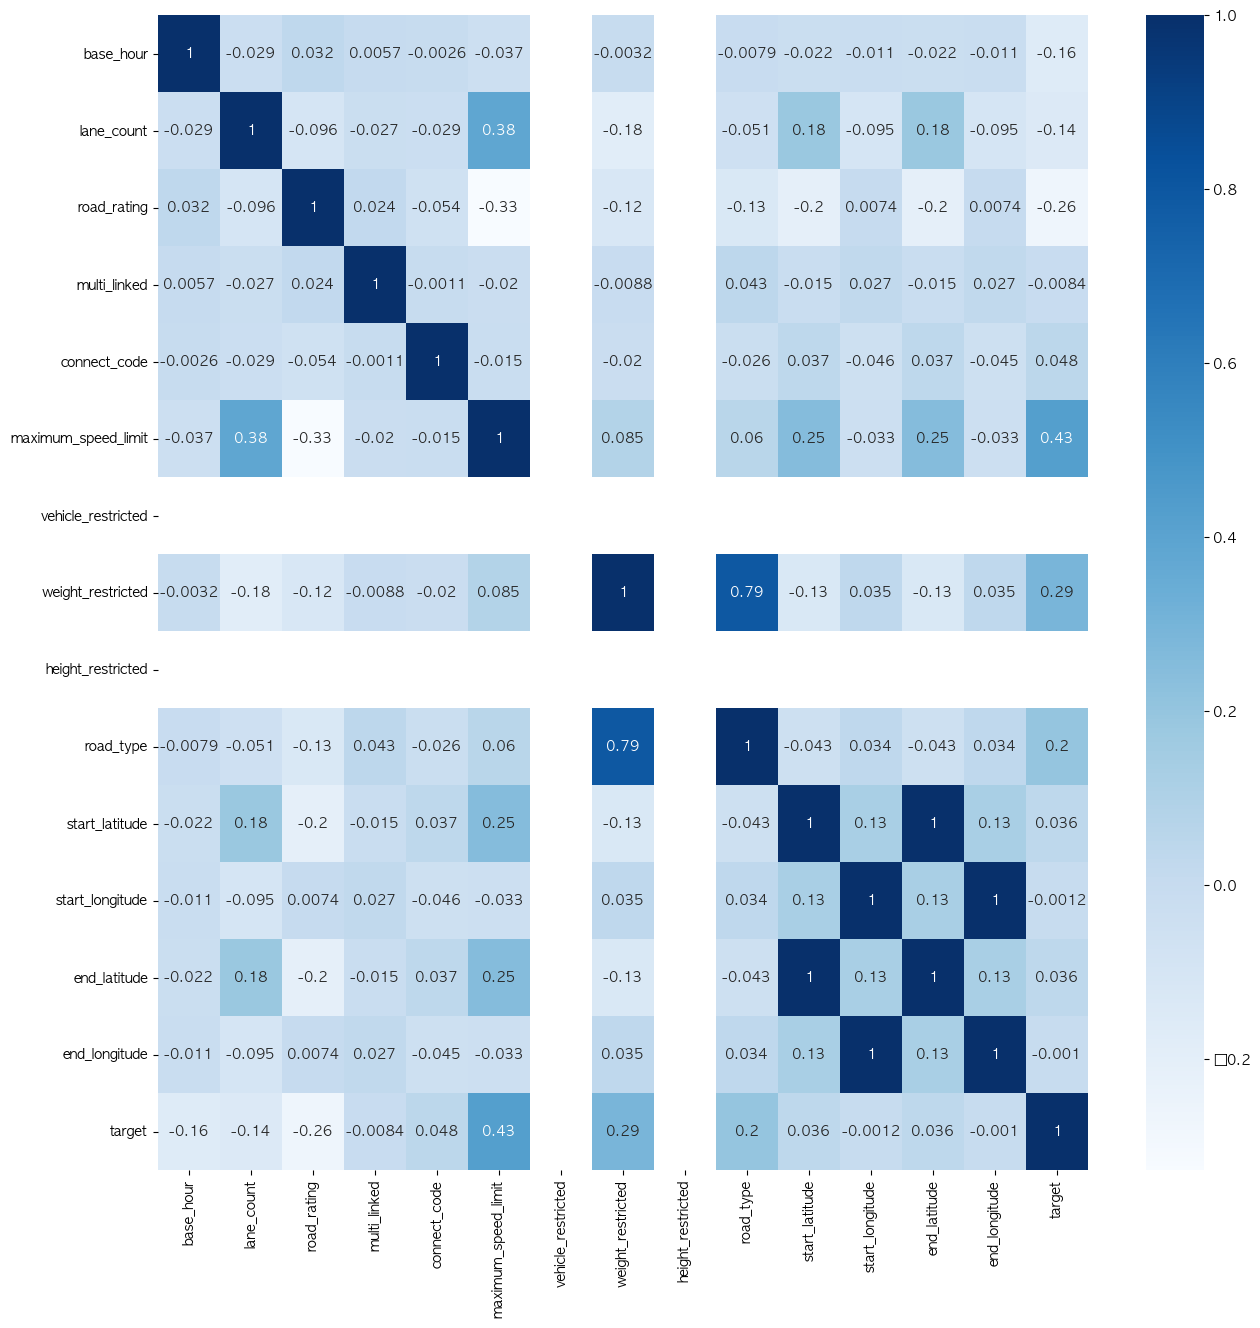

In [118]:
sns.heatmap(df_numerical.corr(), annot=True, cmap = 'Blues')

plt.gcf().set_size_inches(15,15)

In [119]:
df.head(3)

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
df['maximum_speed_limit'].value_counts()

maximum_speed_limit
60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: count, dtype: int64

In [ ]:
df['weight_restricted'].value_counts()

weight_restricted
0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: count, dtype: int64

In [ ]:
df['road_type'].value_counts()

road_type
0    3737117
3     964100
Name: count, dtype: int64

In [ ]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음
...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음


In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
0,17,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,33.427749,126.662335,52.0
1,21,2,103,0,0,60.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0
2,7,2,103,0,0,80.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0
3,13,2,107,0,0,50.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0
4,8,2,103,0,0,80.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0
4701213,2,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,33.472525,126.424890,65.0
4701214,22,2,103,0,0,60.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0
4701215,2,2,103,0,0,80.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0


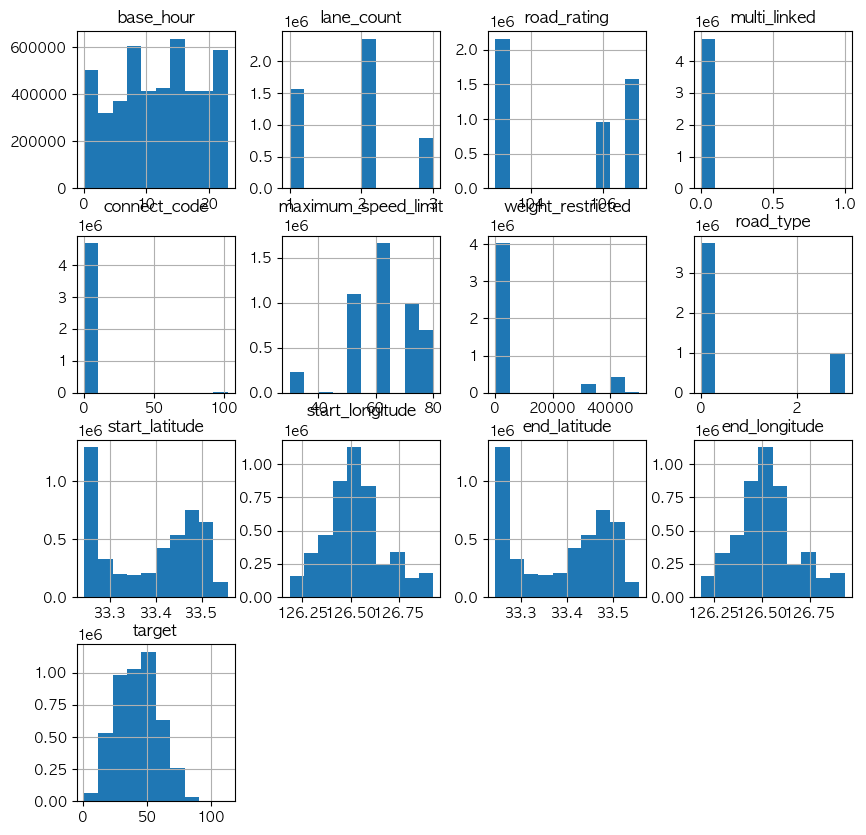

In [ ]:
df_numerical.hist()


plt.gcf().set_size_inches(10,10)

In [ ]:
df['target'].value_counts()

target
48.0     112044
49.0     110244
50.0     108822
54.0     108040
51.0     107347
          ...  
112.0         2
96.0          2
113.0         2
98.0          1
103.0         1
Name: count, Length: 102, dtype: int64

In [ ]:
sns.scatterplot(x=df['maximum_speed_limit'], y=df['target'])

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,33.427749,126.662335,52.0
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0
4701213,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,33.472525,126.424890,65.0
4701214,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0
4701215,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0


In [ ]:
df['target'].describe()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df_categorical['target'] = df['target']

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df_numerical['target_gp'] = np.where( df_numerical['target'] <= df_numerical['target'].describe()[4],1,
                                     np.where( df_numerical['target'] <= df_numerical['target'].describe()[5],2,
                                              np.where( df_numerical['target'] <= df_numerical['target'].describe()[6],3,4)))

In [ ]:
df_numerical['target_gp'].value_counts()

target_gp
2    1229889
1    1181626
3    1160027
4    1129675
Name: count, dtype: int64

In [ ]:
df_numerical.groupby('target_gp')['base_hour'].mean()

target_gp
1    13.373110
2    12.190925
3    11.570485
4    10.498122
Name: base_hour, dtype: float64

In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,33.427749,126.662335,52.0,3
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0,1
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0,4
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0,1
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0,1
4701213,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,33.472525,126.424890,65.0,4
4701214,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0,1
4701215,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0,4


In [ ]:
for col in df_numerical.columns:
    print('===========================================')
    print(col)
    print(df_numerical.groupby('target_gp')[col].mean())

base_hour
target_gp
1    13.373110
2    12.190925
3    11.570485
4    10.498122
Name: base_hour, dtype: float64
lane_count
target_gp
1    2.007912
2    1.890435
3    1.698708
4    1.740610
Name: lane_count, dtype: float64
road_rating
target_gp
1    105.629811
2    105.117267
3    104.549931
4    104.503010
Name: road_rating, dtype: float64
multi_linked
target_gp
1    0.000641
2    0.000502
3    0.000601
4    0.000147
Name: multi_linked, dtype: float64
connect_code
target_gp
1    0.000349
2    0.037351
3    0.423089
4    0.631581
Name: connect_code, dtype: float64
maximum_speed_limit
target_gp
1    56.512492
2    57.233889
3    62.406004
4    69.404395
Name: maximum_speed_limit, dtype: float64
vehicle_restricted
target_gp
1    0.0
2    0.0
3    0.0
4    0.0
Name: vehicle_restricted, dtype: float64
weight_restricted
target_gp
1      553.849695
2     3302.089863
3     8780.499075
4    10192.014517
Name: weight_restricted, dtype: float64
height_restricted
target_gp
1    0.0
2    0.0
3    0

In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,33.427749,126.662335,52.0,3
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0,1
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0,4
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0,1
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0,1
4701213,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,33.472525,126.424890,65.0,4
4701214,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0,1
4701215,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0,4


<Axes: ylabel='base_hour'>

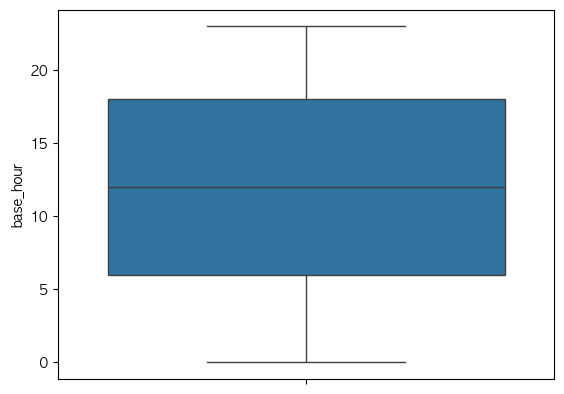

In [ ]:
sns.boxplot(df_numerical['base_hour'])

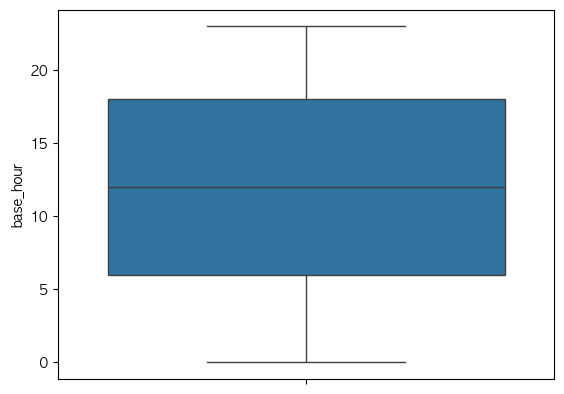

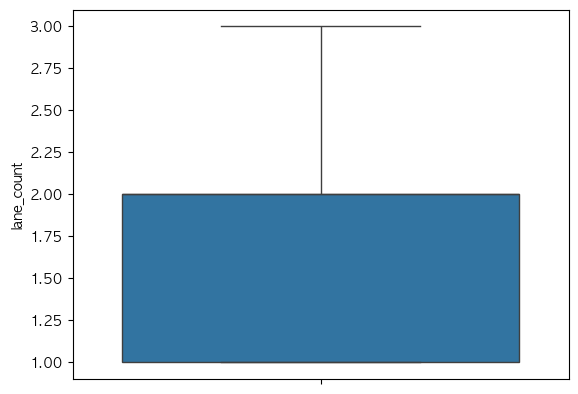

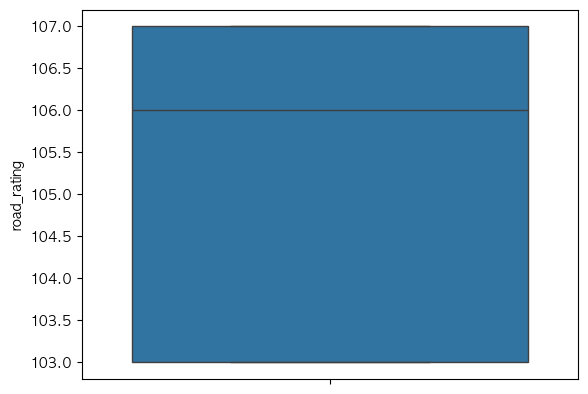

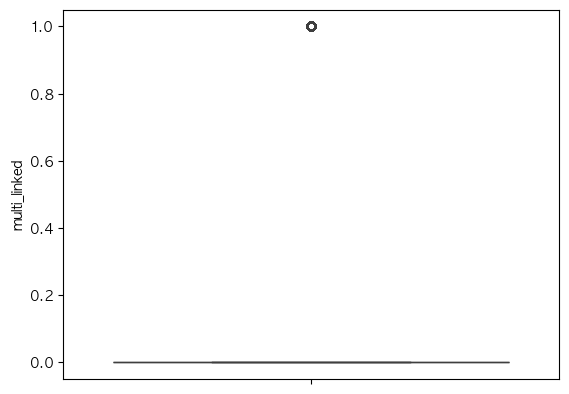

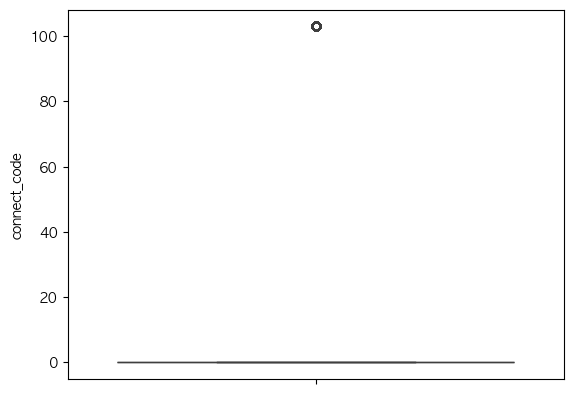

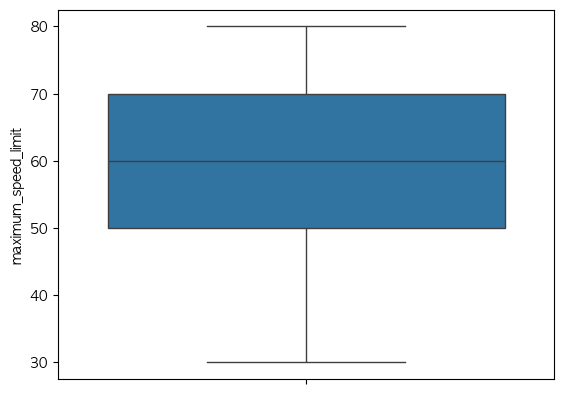

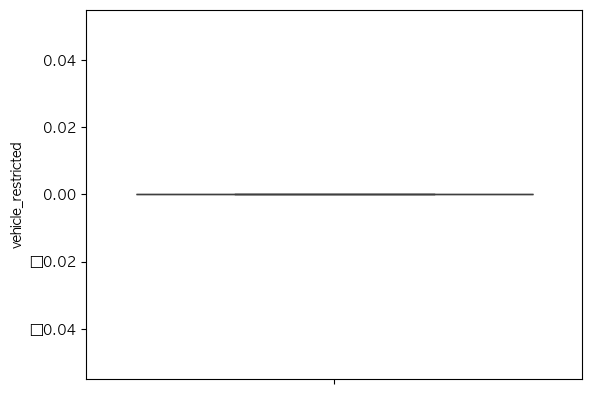

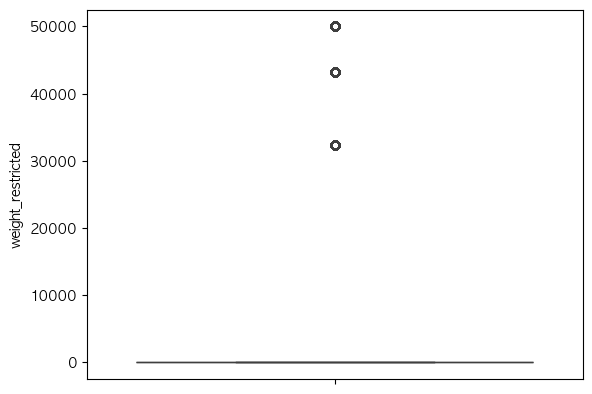

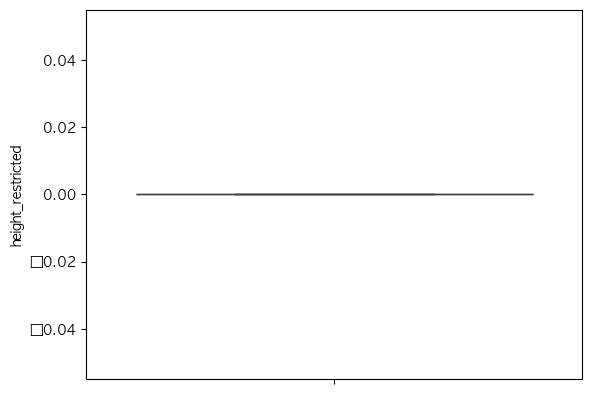

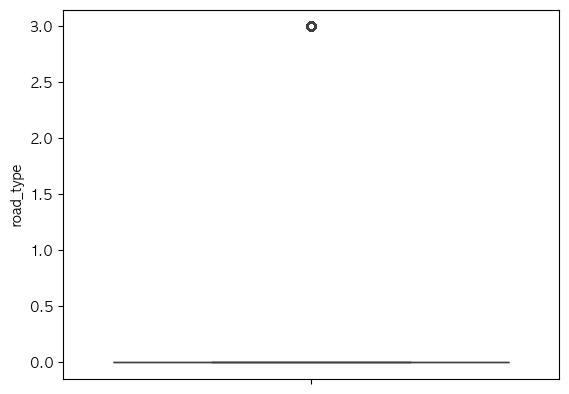

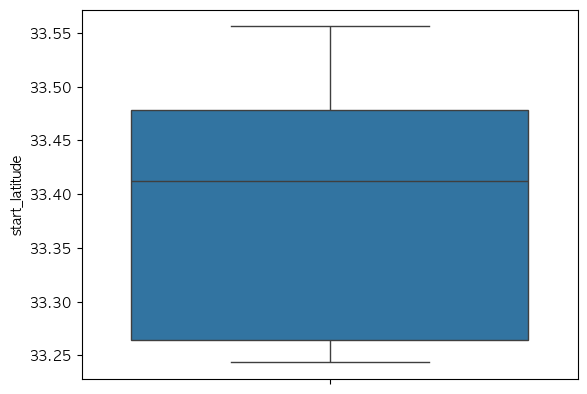

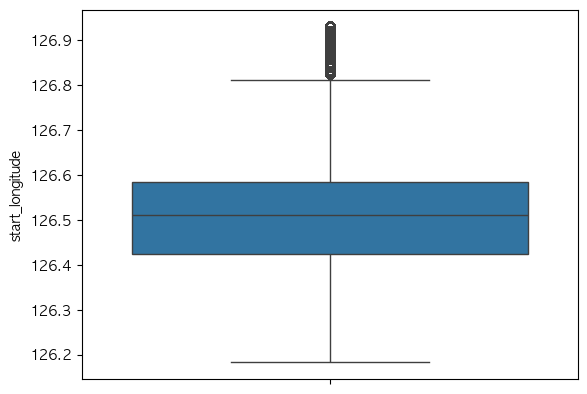

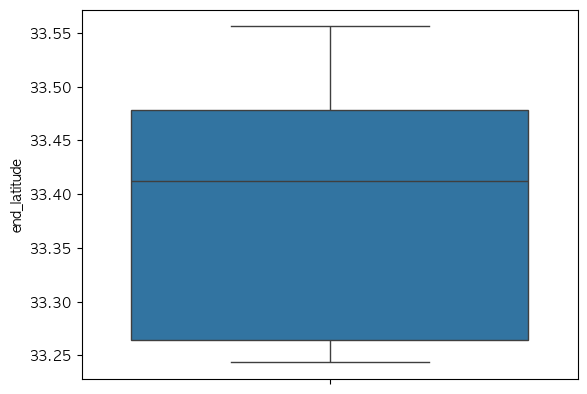

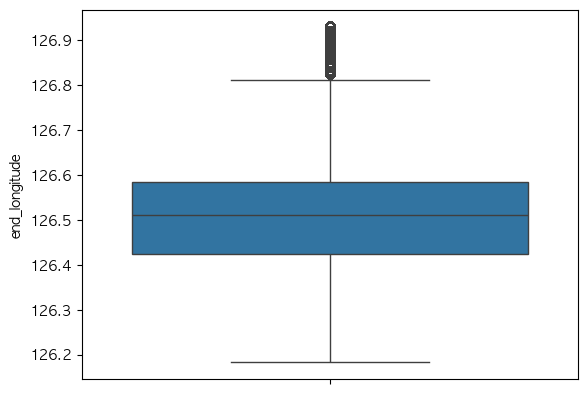

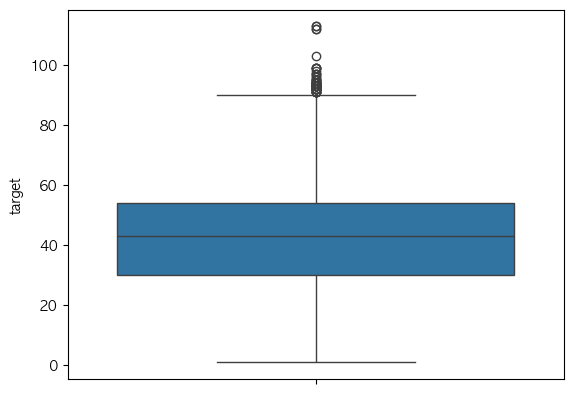

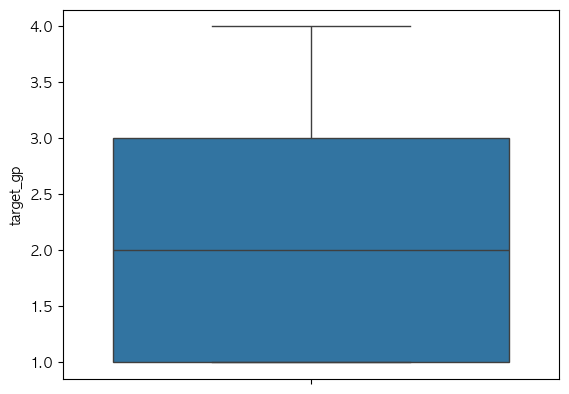

In [ ]:
for col in df_numerical.columns:
    sns.boxplot(df_numerical[col])
    plt.show()

In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
0,17,1,106,0,0,60.0,0.0,32400.0,0.0,3,33.427747,126.662612,33.427749,126.662335,52.0,3
1,21,2,103,0,0,60.0,0.0,0.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0,1
2,7,2,103,0,0,80.0,0.0,0.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0,4
3,13,2,107,0,0,50.0,0.0,0.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0,1
4,8,2,103,0,0,80.0,0.0,0.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0,1
4701213,2,2,107,0,0,80.0,0.0,43200.0,0.0,3,33.472505,126.424368,33.472525,126.424890,65.0,4
4701214,22,2,103,0,0,60.0,0.0,0.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0,1
4701215,2,2,103,0,0,80.0,0.0,0.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0,4


In [ ]:
df['multi_linked'].value_counts()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
df['connect_code'].value_counts()

connect_code
0      4689075
103      12142
Name: count, dtype: int64

In [ ]:
df['weight_restricted'].value_counts()

weight_restricted
0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: count, dtype: int64

In [ ]:
df['start_latitude'].value_counts()

start_latitude
33.248633    23291
33.435941    20775
33.465863    18137
33.507349    18084
33.500330    18076
             ...  
33.491729      881
33.437249      788
33.256671      744
33.261270      744
33.257401      587
Name: count, Length: 586, dtype: int64

In [ ]:
df['target'].value_counts()

target
48.0     112044
49.0     110244
50.0     108822
54.0     108040
51.0     107347
          ...  
112.0         2
96.0          2
113.0         2
98.0          1
103.0         1
Name: count, Length: 102, dtype: int64

In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
0,17,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,33.427749,126.662335,52.0,3
1,21,2,103,0,0,60.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0,1
2,7,2,103,0,0,80.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0,4
3,13,2,107,0,0,50.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0,1
4,8,2,103,0,0,80.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0,1
4701213,2,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,33.472525,126.424890,65.0,4
4701214,22,2,103,0,0,60.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0,1
4701215,2,2,103,0,0,80.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0,4


In [ ]:
df

In [ ]:
df_check = df.groupby(['start_latitude', 'end_latitude'])[['id', 'end_latitude']].count()
df_check

id  end_latitude
start_latitude end_latitude                    
33.243432      33.244882     5528          5528
33.244512      33.249505     4213          4213
33.244601      33.244871     5879          5879
               33.247607     5206          5206
33.244871      33.244601     5937          5937
...                           ...           ...
33.553525      33.554302     5267          5267
33.554302      33.553525     5298          5298
               33.555316     5308          5308
33.555316      33.554302     5306          5306
33.556080      33.551585     3266          3266

[904 rows x 2 columns]

In [ ]:
df_check = df_check.rename_axis(['start', 'end'])

In [ ]:
df_check = pd.DataFrame(df_check)

In [ ]:
# df_check = df_check.reset_index()
df_check.head(50)

,level_0,index,start,end,start_latitude
0,0,0,33.243432,33.244882,5528
1,1,1,33.244512,33.249505,4213
2,2,2,33.244601,33.244871,5879
3,3,3,33.244601,33.247607,5206
4,4,4,33.244871,33.244601,5937
5,5,5,33.244871,33.245150,5898
6,6,6,33.244882,33.243432,5639
7,7,7,33.244882,33.245860,5291
8,8,8,33.245150,33.244871,5910
9,9,9,33.245150,33.245375,5926


In [ ]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [ ]:
df[df['start_latitude'] == 33.427747]

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target


In [ ]:
df_check.sort_values(by=['start_latitude','end_latitude'], ascending=False)

,,start_latitude,end_latitude
start,end,,
33.305867,33.308236,6477,6477
33.308236,33.305867,6397,6397
33.501477,33.496863,6077,6077
33.501627,33.501477,6077,6077
33.496711,33.491848,6075,6075
...,...,...,...
33.256671,33.254153,744,744
33.257410,33.256671,744,744
33.261270,33.257410,744,744


In [ ]:
df.groupby('start_latitude')['end_latitude'].nunique().sort_values(ascending=False)

start_latitude
33.248633    5
33.435941    4
33.252183    3
33.283593    3
33.447183    3
            ..
33.387538    1
33.378724    1
33.375043    1
33.374857    1
33.556080    1
Name: end_latitude, Length: 586, dtype: int64

In [ ]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0


In [ ]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음,52.0
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음,30.0
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음,61.0
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음,20.0
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음,38.0
...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음,73.0


In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
0,17,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,33.427749,126.662335,52.0,3
1,21,2,103,0,0,60.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0,1
2,7,2,103,0,0,80.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0,4
3,13,2,107,0,0,50.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0,1
4,8,2,103,0,0,80.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0,1
4701213,2,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,33.472525,126.424890,65.0,4
4701214,22,2,103,0,0,60.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0,1
4701215,2,2,103,0,0,80.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0,4


In [ ]:
sns.heatmap(df_numerical.corr(), annot=True, cmap='Blues')

plt.gcf().set_size_inches(15,15)

NameError: name 'df_numerical' is not defined

In [11]:
df_categorical

NameError: name 'df_categorical' is not defined

In [12]:
df['start_turn_restricted'].value_counts()

start_turn_restricted
없음    4239701
있음     461516
Name: count, dtype: int64

In [ ]:
for col in df_categorical.columns:
    print('===============================')
    print(col)
    
    print(df[col].value_counts())

id
id
TRAIN_0000000    1
TRAIN_3134142    1
TRAIN_3134148    1
TRAIN_3134147    1
TRAIN_3134146    1
                ..
TRAIN_1567079    1
TRAIN_1567080    1
TRAIN_1567081    1
TRAIN_1567082    1
TRAIN_4701216    1
Name: count, Length: 4701217, dtype: int64
base_date
base_date
2022-06-03    20544
2022-05-04    20460
2022-06-02    20441
2022-06-26    20429
2022-06-09    20415
              ...  
2022-03-15     2163
2021-11-07     2071
2022-07-30     1845
2022-05-19     1558
2022-05-18     1555
Name: count, Length: 281, dtype: int64
day_of_week
day_of_week
금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: count, dtype: int64
road_name
road_name
일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: count, Length: 61, dtype: int64
start_node_name
start_node_name
고성교차로              

In [ ]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음,52.0
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음,30.0
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음,61.0
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음,20.0
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음,38.0
...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음,73.0


<Axes: xlabel='day_of_week', ylabel='target'>

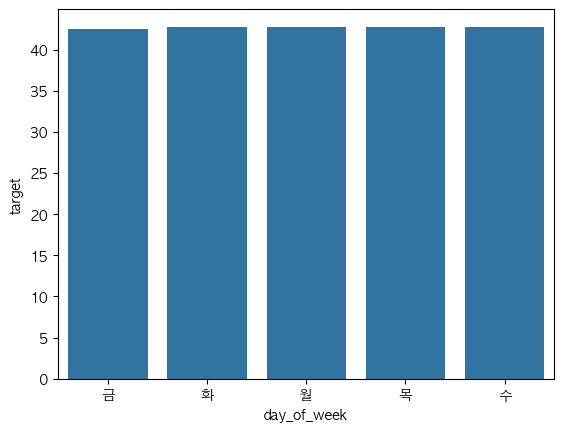

In [ ]:
df_check = pd.DataFrame(df.groupby('day_of_week')['target'].mean().sort_values()).head(5)
df_check

sns.barplot(data=df_check, x=df_check.index, y='target')



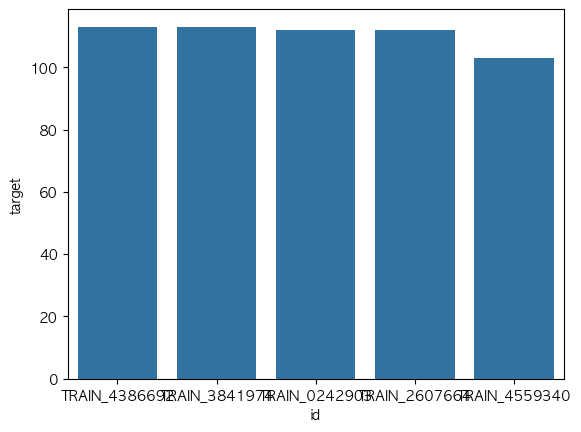

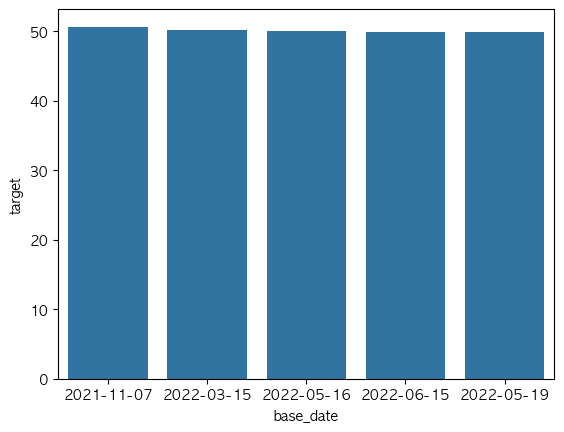

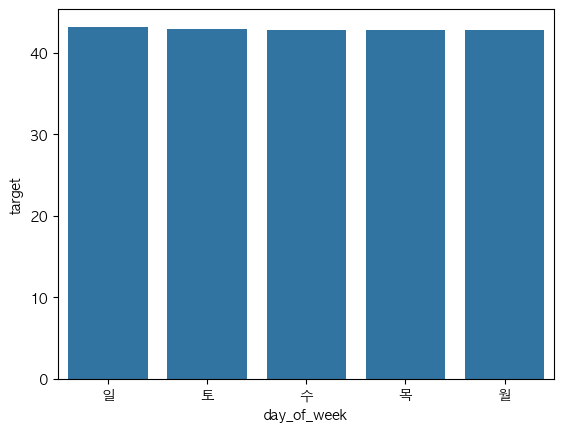

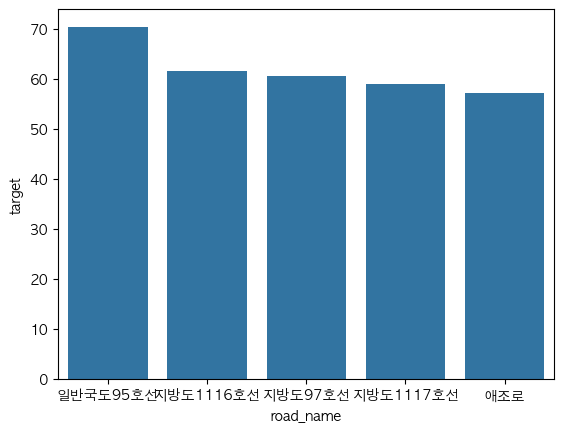

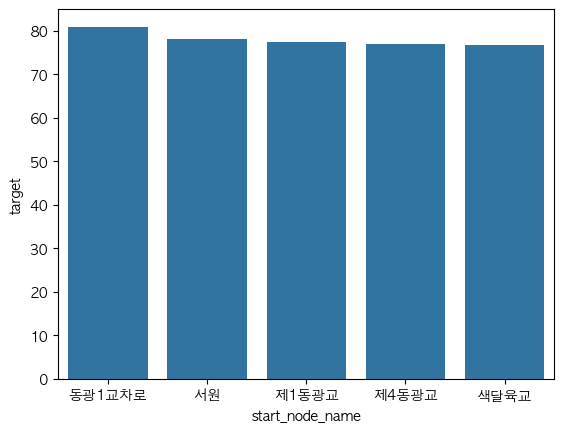

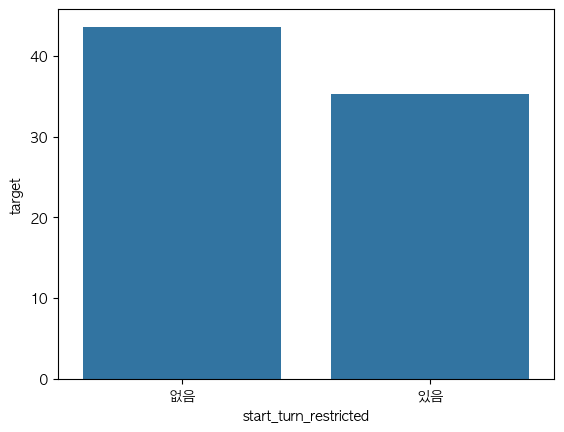

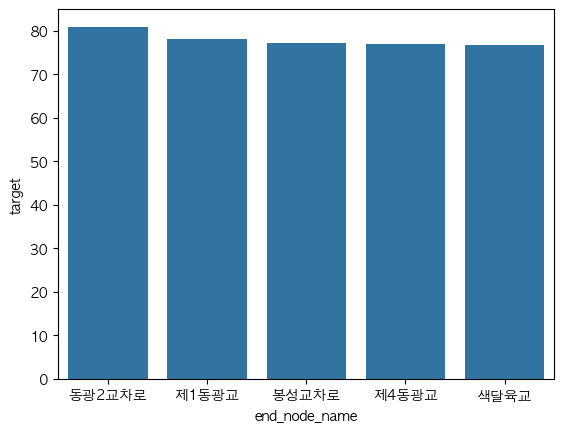

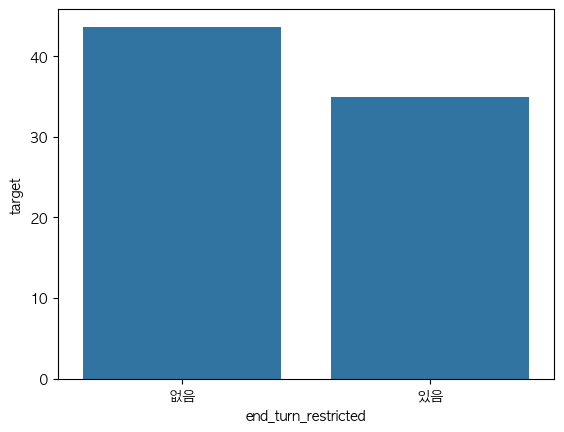

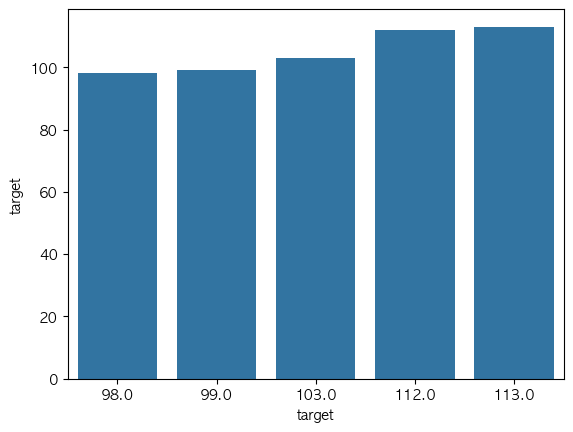

In [ ]:
for i in df_categorical.columns:
    print('================================================================')
    df_check = pd.DataFrame(df.groupby(i)['target'].mean().sort_values(ascending=False)).head(5)
    df_check
    sns.barplot(data=df_check, x=df_check.index, y='target')
    plt.show()


In [ ]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음,52.0
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음,30.0
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음,61.0
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음,20.0
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음,38.0
...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음,73.0


In [ ]:
df['base_date'] = pd.to_datetime(df['base_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   id                     object        
 1   base_date              datetime64[ns]
 2   day_of_week            object        
 3   base_hour              int64         
 4   lane_count             int64         
 5   road_rating            int64         
 6   road_name              object        
 7   multi_linked           int64         
 8   connect_code           int64         
 9   maximum_speed_limit    float64       
 10  weight_restricted      float64       
 11  road_type              int64         
 12  start_node_name        object        
 13  start_latitude         float64       
 14  start_longitude        float64       
 15  start_turn_restricted  object        
 16  end_node_name          object        
 17  end_latitude           float64       
 18  end_longitude         

In [ ]:
df['year'] = df['base_date'].dt.year
df['month'] = df['base_date'].dt.month
df['day'] = df['base_date'].dt.day

In [ ]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20


In [ ]:
df.groupby(['year', 'month', 'road_name', 'maximum_speed_limit'])['target'].mean()

year  month  road_name  maximum_speed_limit
2021  9      -          30.0                   39.401167
                        50.0                   37.443212
                        60.0                   43.523874
                        70.0                   58.157175
                        80.0                   59.870072
                                                 ...    
2022  7      지방도1136호선  60.0                   47.100364
             지방도97호선    60.0                   64.029630
             첨단로        50.0                   31.553222
             태평로        50.0                   23.600133
             한천로        60.0                   22.640000
Name: target, Length: 926, dtype: float64

In [ ]:
df['base_date'].astype('str').str[:7].min(), df['base_date'].astype('str').str[:7].max()

('2021-09', '2022-07')

In [ ]:
df['yearmonth'] = df['base_date'].astype('str').str[:7]

In [ ]:
df_check = pd.DataFrame(df.groupby(['year', 'road_name', 'maximum_speed_limit'])['target'].mean()).reset_index().head(50)

In [ ]:
df_check[df_check['maximum_speed_limit'] < df_check['target'] ]

,year,road_name,maximum_speed_limit,target
0,2021,-,30.0,39.013146
7,2021,관광단지1로,30.0,39.513310
8,2021,관광단지2로,30.0,34.479904
9,2021,관광단지로,30.0,30.047341
49,2021,일반국도12호선,40.0,66.461949


In [ ]:
df_check.sort_values(by='maximum_speed_limit', ascending=False)

,year,road_name,maximum_speed_limit,target
37,2021,애조로,80.0,57.668804
4,2021,-,80.0,59.732997
33,2021,신대로,70.0,22.549663
43,2021,연삼로,70.0,35.203123
40,2021,연북2교,70.0,37.230650
47,2021,일반국도11호선,70.0,26.735784
18,2021,번영로,70.0,52.348894
3,2021,-,70.0,58.442220
34,2021,신산로,60.0,30.116413
17,2021,동홍로,60.0,36.002727


In [ ]:
df_check[['maximum_speed_limit', 'target']].corr()

,maximum_speed_limit,target
maximum_speed_limit,1.000000,0.354608
target,0.354608,1.000000


In [ ]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음,52.0
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음,30.0
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음,61.0
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음,20.0
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음,38.0
...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음,73.0


In [ ]:
df_check = pd.DataFrame(df.groupby(['road_name', 'start_node_name', 'end_node_name']).agg({'start_node_name': 'count', 'end_node_name': 'count'}))
df_check.columns = ['start_count', 'end_count']
df_check = df_check.reset_index()
df_check
df_check[df_check['road_name'] == '호서중앙로']

,road_name,start_node_name,end_node_name,start_count,end_count
806,호서중앙로,CU서귀호근로점,서호교회,744,744
807,호서중앙로,서귀포시 호근동 1838-4,서귀포시 서호동 308-6,744,744
808,호서중앙로,서호교회,CU서귀호근로점,587,587
809,호서중앙로,서호교회,서귀포시 호근동 1838-4,744,744


In [ ]:
df.groupby('start_turn_restricted')['target'].mean()

start_turn_restricted
없음    43.610246
있음    35.238967
Name: target, dtype: float64

In [ ]:
df.groupby('end_turn_restricted')['target'].mean()

end_turn_restricted
없음    43.645590
있음    34.916206
Name: target, dtype: float64

In [ ]:
df['road_name'].value_counts().sort_values(ascending=False)

road_name
일반국도12호선    1046092
-            569463
일반국도16호선     554510
일반국도95호선     248181
일반국도11호선     215701
             ...   
애원로            7718
아봉로            7342
남조로            6813
호서중앙로          2819
호근로             587
Name: count, Length: 61, dtype: int64

In [ ]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,yearmonth
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,2022-06
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,2022-07
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,2021-10
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,2022-03
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,2021-11
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,2022-03
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,2022-06
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,2021-10


In [ ]:
df_numerical.corr()

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
base_hour,1.000000,-0.029194,0.031658,0.005711,-0.002649,-0.036756,-0.003231,-0.007880,-0.021599,-0.011478,-0.021597,-0.011489,-0.159407,-0.152574
lane_count,-0.029194,1.000000,-0.095717,-0.026555,-0.029290,0.384002,-0.177224,-0.050715,0.182674,-0.094806,0.182330,-0.094732,-0.144256,-0.161395
road_rating,0.031658,-0.095717,1.000000,0.024218,-0.054160,-0.327474,-0.118630,-0.125618,-0.204793,0.007401,-0.204843,0.007386,-0.261693,-0.239082
multi_linked,0.005711,-0.026555,0.024218,1.000000,-0.001111,-0.020245,-0.008790,0.042977,-0.014906,0.026895,-0.014907,0.026896,-0.008408,-0.006979
connect_code,-0.002649,-0.029290,-0.054160,-0.001111,1.000000,-0.015190,-0.020491,-0.025846,0.036623,-0.045695,0.037163,-0.044853,0.048348,0.048450
maximum_speed_limit,-0.036756,0.384002,-0.327474,-0.020245,-0.015190,1.000000,0.085080,0.059511,0.253147,-0.033018,0.252958,-0.032907,0.425715,0.400351
weight_restricted,-0.003231,-0.177224,-0.118630,-0.008790,-0.020491,0.085080,1.000000,0.792803,-0.128291,0.034926,-0.128305,0.034915,0.294092,0.274402
road_type,-0.007880,-0.050715,-0.125618,0.042977,-0.025846,0.059511,0.792803,1.000000,-0.043420,0.033684,-0.043430,0.033664,0.200840,0.187269
start_latitude,-0.021599,0.182674,-0.204793,-0.014906,0.036623,0.253147,-0.128291,-0.043420,1.000000,0.127042,0.999106,0.127005,0.036280,0.046798
start_longitude,-0.011478,-0.094806,0.007401,0.026895,-0.045695,-0.033018,0.034926,0.033684,0.127042,1.000000,0.126900,0.999219,-0.001168,0.039785


In [ ]:
df_numerical


,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
0,17,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,33.427749,126.662335,52.0,3
1,21,2,103,0,0,60.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0,1
2,7,2,103,0,0,80.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0,4
3,13,2,107,0,0,50.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0,1
4,8,2,103,0,0,80.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0,1
4701213,2,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,33.472525,126.424890,65.0,4
4701214,22,2,103,0,0,60.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0,1
4701215,2,2,103,0,0,80.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0,4


In [ ]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음,52.0
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음,30.0
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음,61.0
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음,20.0
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음,38.0
...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음,73.0


In [ ]:
df_categorical

,id,base_date,day_of_week,road_name,start_node_name,start_turn_restricted,end_node_name,end_turn_restricted,target
0,TRAIN_0000000,2022-06-23,목,지방도1112호선,제3교래교,없음,제3교래교,없음,52.0
1,TRAIN_0000001,2022-07-28,목,일반국도11호선,광양사거리,있음,KAL사거리,없음,30.0
2,TRAIN_0000002,2021-10-10,일,일반국도16호선,창고천교,없음,상창육교,없음,61.0
3,TRAIN_0000003,2022-03-11,금,태평로,남양리조트,없음,서현주택,없음,20.0
4,TRAIN_0000004,2021-10-05,화,일반국도12호선,애월샷시,없음,애월입구,없음,38.0
...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,-,대림사거리,없음,금덕해운,없음,20.0
4701213,TRAIN_4701213,2022-03-31,목,-,광삼교,없음,광삼교,없음,65.0
4701214,TRAIN_4701214,2022-06-13,월,일반국도12호선,고성교차로,없음,성산교차로,없음,30.0
4701215,TRAIN_4701215,2021-10-20,수,일반국도95호선,제6광령교,없음,관광대학입구,없음,73.0


In [ ]:
df_numerical

,base_hour,lane_count,road_rating,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_latitude,start_longitude,end_latitude,end_longitude,target,target_gp
0,17,1,106,0,0,60.0,32400.0,3,33.427747,126.662612,33.427749,126.662335,52.0,3
1,21,2,103,0,0,60.0,0.0,0,33.500730,126.529107,33.504811,126.526240,30.0,1
2,7,2,103,0,0,80.0,0.0,0,33.279145,126.368598,33.280072,126.362147,61.0,4
3,13,2,107,0,0,50.0,0.0,0,33.246081,126.567204,33.245565,126.566228,20.0,1
4,8,2,103,0,0,80.0,0.0,0,33.462214,126.326551,33.462677,126.330152,38.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,16,1,107,0,0,50.0,0.0,0,33.422145,126.278125,33.420955,126.273750,20.0,1
4701213,2,2,107,0,0,80.0,43200.0,3,33.472505,126.424368,33.472525,126.424890,65.0,4
4701214,22,2,103,0,0,60.0,0.0,0,33.447183,126.912579,33.444121,126.912948,30.0,1
4701215,2,2,103,0,0,80.0,0.0,0,33.443596,126.431817,33.444996,126.433332,73.0,4


<Axes: >

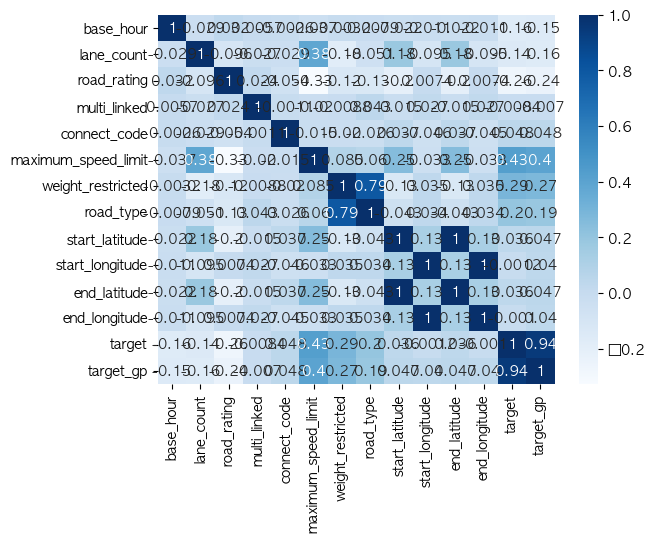

In [ ]:
sns.heatmap(df_numerical.corr(), annot=True, cmap='Blues')

In [ ]:
df

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,year,month,day,yearmonth
0,TRAIN_0000000,2022-06-23,목,17,1,106,지방도1112호선,0,0,60.0,32400.0,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0,2022,6,23,2022-06
1,TRAIN_0000001,2022-07-28,목,21,2,103,일반국도11호선,0,0,60.0,0.0,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0,2022,7,28,2022-07
2,TRAIN_0000002,2021-10-10,일,7,2,103,일반국도16호선,0,0,80.0,0.0,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0,2021,10,10,2021-10
3,TRAIN_0000003,2022-03-11,금,13,2,107,태평로,0,0,50.0,0.0,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0,2022,3,11,2022-03
4,TRAIN_0000004,2021-10-05,화,8,2,103,일반국도12호선,0,0,80.0,0.0,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0,2021,10,5,2021-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701212,TRAIN_4701212,2021-11-04,목,16,1,107,-,0,0,50.0,0.0,0,대림사거리,33.422145,126.278125,없음,금덕해운,33.420955,126.273750,없음,20.0,2021,11,4,2021-11
4701213,TRAIN_4701213,2022-03-31,목,2,2,107,-,0,0,80.0,43200.0,3,광삼교,33.472505,126.424368,없음,광삼교,33.472525,126.424890,없음,65.0,2022,3,31,2022-03
4701214,TRAIN_4701214,2022-06-13,월,22,2,103,일반국도12호선,0,0,60.0,0.0,0,고성교차로,33.447183,126.912579,없음,성산교차로,33.444121,126.912948,없음,30.0,2022,6,13,2022-06
4701215,TRAIN_4701215,2021-10-20,수,2,2,103,일반국도95호선,0,0,80.0,0.0,0,제6광령교,33.443596,126.431817,없음,관광대학입구,33.444996,126.433332,없음,73.0,2021,10,20,2021-10


In [120]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb











In [121]:
df

In [122]:
df[categorcial_list]

NameError: name 'categorcial_list' is not defined

In [123]:
categorical_list = []
numerical_list = []


for i  in df_anal.columns:
    if df_anal[i].dtypes == 'O':
        categorical_list.append(i)
    else:
        numerical_list.append(i)


In [124]:
categorical_list, numerical_list

(['id',
  'day_of_week',
  'road_name',
  'start_node_name',
  'start_turn_restricted',
  'end_node_name',
  'end_turn_restricted'],
 ['base_date',
  'base_hour',
  'lane_count',
  'road_rating',
  'multi_linked',
  'connect_code',
  'maximum_speed_limit',
  'vehicle_restricted',
  'weight_restricted',
  'height_restricted',
  'road_type',
  'start_latitude',
  'start_longitude',
  'end_latitude',
  'end_longitude',
  'target'])

In [125]:
df_anal

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
1668774,TRAIN_1668774,20220123,일,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,이호동입구1,33.495269,126.459948,없음,이호동입구2,33.494929,126.461602,없음,52.0
299795,TRAIN_0299795,20220709,토,11,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,명도암교차로,33.485707,126.604162,있음,버으내교차로,33.480053,126.625486,있음,57.0
2245633,TRAIN_2245633,20220709,토,12,1,107,산서로,0,0,50.0,0.0,0.0,0.0,0,색달동,33.261756,126.412579,없음,자유도시민박,33.262025,126.414360,없음,25.0
434484,TRAIN_0434484,20210912,일,1,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,성산교차로,33.444121,126.912948,없음,신양교차로,33.434834,126.909657,없음,58.0
4562091,TRAIN_4562091,20220618,토,10,1,106,지방도1115호선,0,0,60.0,0.0,43200.0,0.0,3,제5산록교,33.291747,126.505010,없음,제5산록교,33.291731,126.504396,없음,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878557,TRAIN_3878557,20220119,수,23,3,106,동부관광도로,0,0,50.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,국립제주박물관,33.511579,126.547564,있음,37.0
1313857,TRAIN_1313857,20210904,토,19,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,제2거로교,33.508464,126.558231,없음,29.0
4476807,TRAIN_4476807,20220120,목,21,1,106,지방도1112호선,0,0,60.0,0.0,0.0,0.0,0,송당입구,33.478605,126.783057,없음,큰물교,33.476588,126.780886,없음,45.0
3260895,TRAIN_3260895,20220106,목,1,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순2교,33.259206,126.474687,없음,도순3교,33.258960,126.476508,없음,61.0


In [126]:
df['base_date'].astype('str').str[:4]

TypeError: 'NoneType' object is not subscriptable

In [127]:
df_anal['month'] = df_anal['base_date'].astype('str').str[4:6]

In [128]:
df_anal['base_date'].astype('str').str[6:8]

1668774    23
299795     09
2245633    09
434484     12
4562091    18
           ..
3878557    19
1313857    04
4476807    20
3260895    06
311112     07
Name: base_date, Length: 100000, dtype: object

In [129]:
df_anal['day'] = df_anal['base_date'].astype('str').str[6:8]

In [130]:
df

In [131]:
df_anal

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month,day
1668774,TRAIN_1668774,20220123,일,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,이호동입구1,33.495269,126.459948,없음,이호동입구2,33.494929,126.461602,없음,52.0,01,23
299795,TRAIN_0299795,20220709,토,11,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,명도암교차로,33.485707,126.604162,있음,버으내교차로,33.480053,126.625486,있음,57.0,07,09
2245633,TRAIN_2245633,20220709,토,12,1,107,산서로,0,0,50.0,0.0,0.0,0.0,0,색달동,33.261756,126.412579,없음,자유도시민박,33.262025,126.414360,없음,25.0,07,09
434484,TRAIN_0434484,20210912,일,1,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,성산교차로,33.444121,126.912948,없음,신양교차로,33.434834,126.909657,없음,58.0,09,12
4562091,TRAIN_4562091,20220618,토,10,1,106,지방도1115호선,0,0,60.0,0.0,43200.0,0.0,3,제5산록교,33.291747,126.505010,없음,제5산록교,33.291731,126.504396,없음,53.0,06,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878557,TRAIN_3878557,20220119,수,23,3,106,동부관광도로,0,0,50.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,국립제주박물관,33.511579,126.547564,있음,37.0,01,19
1313857,TRAIN_1313857,20210904,토,19,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,제2거로교,33.508464,126.558231,없음,29.0,09,04
4476807,TRAIN_4476807,20220120,목,21,1,106,지방도1112호선,0,0,60.0,0.0,0.0,0.0,0,송당입구,33.478605,126.783057,없음,큰물교,33.476588,126.780886,없음,45.0,01,20
3260895,TRAIN_3260895,20220106,목,1,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순2교,33.259206,126.474687,없음,도순3교,33.258960,126.476508,없음,61.0,01,06


In [132]:
df_anal

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month,day
1668774,TRAIN_1668774,20220123,일,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,이호동입구1,33.495269,126.459948,없음,이호동입구2,33.494929,126.461602,없음,52.0,01,23
299795,TRAIN_0299795,20220709,토,11,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,명도암교차로,33.485707,126.604162,있음,버으내교차로,33.480053,126.625486,있음,57.0,07,09
2245633,TRAIN_2245633,20220709,토,12,1,107,산서로,0,0,50.0,0.0,0.0,0.0,0,색달동,33.261756,126.412579,없음,자유도시민박,33.262025,126.414360,없음,25.0,07,09
434484,TRAIN_0434484,20210912,일,1,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,성산교차로,33.444121,126.912948,없음,신양교차로,33.434834,126.909657,없음,58.0,09,12
4562091,TRAIN_4562091,20220618,토,10,1,106,지방도1115호선,0,0,60.0,0.0,43200.0,0.0,3,제5산록교,33.291747,126.505010,없음,제5산록교,33.291731,126.504396,없음,53.0,06,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878557,TRAIN_3878557,20220119,수,23,3,106,동부관광도로,0,0,50.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,국립제주박물관,33.511579,126.547564,있음,37.0,01,19
1313857,TRAIN_1313857,20210904,토,19,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,제2거로교,33.508464,126.558231,없음,29.0,09,04
4476807,TRAIN_4476807,20220120,목,21,1,106,지방도1112호선,0,0,60.0,0.0,0.0,0.0,0,송당입구,33.478605,126.783057,없음,큰물교,33.476588,126.780886,없음,45.0,01,20
3260895,TRAIN_3260895,20220106,목,1,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순2교,33.259206,126.474687,없음,도순3교,33.258960,126.476508,없음,61.0,01,06


In [133]:
df

In [134]:
df_anal

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target,month,day
1668774,TRAIN_1668774,20220123,일,2,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,이호동입구1,33.495269,126.459948,없음,이호동입구2,33.494929,126.461602,없음,52.0,01,23
299795,TRAIN_0299795,20220709,토,11,3,106,번영로,0,0,70.0,0.0,0.0,0.0,0,명도암교차로,33.485707,126.604162,있음,버으내교차로,33.480053,126.625486,있음,57.0,07,09
2245633,TRAIN_2245633,20220709,토,12,1,107,산서로,0,0,50.0,0.0,0.0,0.0,0,색달동,33.261756,126.412579,없음,자유도시민박,33.262025,126.414360,없음,25.0,07,09
434484,TRAIN_0434484,20210912,일,1,2,103,일반국도12호선,0,0,60.0,0.0,0.0,0.0,0,성산교차로,33.444121,126.912948,없음,신양교차로,33.434834,126.909657,없음,58.0,09,12
4562091,TRAIN_4562091,20220618,토,10,1,106,지방도1115호선,0,0,60.0,0.0,43200.0,0.0,3,제5산록교,33.291747,126.505010,없음,제5산록교,33.291731,126.504396,없음,53.0,06,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878557,TRAIN_3878557,20220119,수,23,3,106,동부관광도로,0,0,50.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,국립제주박물관,33.511579,126.547564,있음,37.0,01,19
1313857,TRAIN_1313857,20210904,토,19,3,107,연삼로,0,0,70.0,0.0,0.0,0.0,0,거로사거리,33.507349,126.556173,있음,제2거로교,33.508464,126.558231,없음,29.0,09,04
4476807,TRAIN_4476807,20220120,목,21,1,106,지방도1112호선,0,0,60.0,0.0,0.0,0.0,0,송당입구,33.478605,126.783057,없음,큰물교,33.476588,126.780886,없음,45.0,01,20
3260895,TRAIN_3260895,20220106,목,1,1,103,일반국도16호선,0,0,60.0,0.0,0.0,0.0,0,도순2교,33.259206,126.474687,없음,도순3교,33.258960,126.476508,없음,61.0,01,06


In [209]:
X = df_anal.drop(['id', 'base_date', 'target'], axis=1)
Y = df_anal['target']

In [210]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [211]:
categorical_list

['day_of_week',
 'road_name',
 'start_node_name',
 'start_turn_restricted',
 'end_node_name',
 'end_turn_restricted']

In [212]:
# categorical_list.remove('base_date')

In [213]:
categorical_list

['day_of_week',
 'road_name',
 'start_node_name',
 'start_turn_restricted',
 'end_node_name',
 'end_turn_restricted']

In [214]:
# categorical_list.remove('id')

In [215]:
le = LabelEncoder()

for col in categorical_list:
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])







In [216]:
x_train

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,month,day
3311242,0,10,2,107,7,0,0,60.0,0.0,0.0,0.0,0,411,33.251614,126.508321,0,136,33.251426,126.509066,0,01,21
1780688,5,6,2,107,0,0,0,50.0,0.0,0.0,0.0,0,161,33.255215,126.414236,0,160,33.255431,126.413687,0,12,18
3872508,1,2,2,107,0,0,0,80.0,0.0,0.0,0.0,0,352,33.472276,126.418443,0,175,33.473390,126.409129,0,02,10
3803024,3,8,3,103,36,0,0,70.0,0.0,0.0,0.0,0,461,33.480679,126.472216,1,339,33.478257,126.468081,1,12,13
4335878,6,9,2,107,0,0,0,80.0,0.0,0.0,0.0,0,474,33.465863,126.456384,0,471,33.466433,126.454583,0,09,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231447,4,8,1,107,42,0,0,50.0,0.0,0.0,0.0,0,89,33.251146,126.433807,0,354,33.251095,126.435138,0,10,24
561414,6,3,2,103,37,0,0,80.0,0.0,0.0,0.0,0,385,33.436690,126.424159,0,19,33.437744,126.425663,0,10,05
1583550,5,4,1,106,55,0,0,60.0,0.0,0.0,0.0,0,216,33.410423,126.769650,0,377,33.408913,126.772518,0,12,11
3975317,2,13,2,107,14,0,0,50.0,0.0,0.0,0.0,0,405,33.490078,126.486558,1,165,33.489940,126.490153,0,02,23


In [217]:
x_test

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,month,day
2915029,2,19,2,103,36,0,0,60.0,0.0,0.0,0.0,0,207,33.263685,126.550978,0,206,33.264112,126.554043,0,01,12
854773,5,0,1,103,34,0,0,70.0,0.0,0.0,0.0,0,223,33.494763,126.533654,0,141,33.492718,126.535597,0,02,05
4188374,5,5,2,106,12,0,0,70.0,0.0,0.0,0.0,0,60,33.469731,126.659986,1,225,33.469918,126.664161,1,02,19
150234,4,17,2,107,0,0,0,80.0,0.0,0.0,0.0,0,176,33.473390,126.409129,0,352,33.472276,126.418443,0,12,05
2449626,0,20,2,103,35,0,0,50.0,0.0,0.0,0.0,0,156,33.547888,126.694628,0,155,33.546744,126.691039,0,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728499,2,17,2,107,7,0,0,60.0,0.0,0.0,0.0,0,137,33.251426,126.509066,0,411,33.251614,126.508321,0,07,13
2142763,3,6,1,103,35,0,0,60.0,0.0,0.0,0.0,0,56,33.257983,126.352935,0,265,33.259898,126.356370,0,06,06
2919059,6,7,1,103,36,0,0,50.0,0.0,0.0,0.0,0,335,33.260178,126.490345,0,337,33.260056,126.490987,0,03,01
421309,4,6,3,103,35,0,0,70.0,0.0,0.0,0.0,0,92,33.500020,126.524924,1,197,33.499848,126.519872,1,02,27


In [218]:
x_train.shape

(70000, 22)

In [219]:
x_test.shape

(30000, 22)

In [220]:
train_columns = x_train.columns
test_columns = x_test.columns

In [221]:
train_columns

Index(['day_of_week', 'base_hour', 'lane_count', 'road_rating', 'road_name',
       'multi_linked', 'connect_code', 'maximum_speed_limit',
       'vehicle_restricted', 'weight_restricted', 'height_restricted',
       'road_type', 'start_node_name', 'start_latitude', 'start_longitude',
       'start_turn_restricted', 'end_node_name', 'end_latitude',
       'end_longitude', 'end_turn_restricted', 'month', 'day'],
      dtype='object')

In [234]:
x_train

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,month,day
3311242,0,10,2,107,7,0,0,60.0,0.0,0.0,0.0,0,411,33.251614,126.508321,0,136,33.251426,126.509066,0,01,21
1780688,5,6,2,107,0,0,0,50.0,0.0,0.0,0.0,0,161,33.255215,126.414236,0,160,33.255431,126.413687,0,12,18
3872508,1,2,2,107,0,0,0,80.0,0.0,0.0,0.0,0,352,33.472276,126.418443,0,175,33.473390,126.409129,0,02,10
3803024,3,8,3,103,36,0,0,70.0,0.0,0.0,0.0,0,461,33.480679,126.472216,1,339,33.478257,126.468081,1,12,13
4335878,6,9,2,107,0,0,0,80.0,0.0,0.0,0.0,0,474,33.465863,126.456384,0,471,33.466433,126.454583,0,09,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231447,4,8,1,107,42,0,0,50.0,0.0,0.0,0.0,0,89,33.251146,126.433807,0,354,33.251095,126.435138,0,10,24
561414,6,3,2,103,37,0,0,80.0,0.0,0.0,0.0,0,385,33.436690,126.424159,0,19,33.437744,126.425663,0,10,05
1583550,5,4,1,106,55,0,0,60.0,0.0,0.0,0.0,0,216,33.410423,126.769650,0,377,33.408913,126.772518,0,12,11
3975317,2,13,2,107,14,0,0,50.0,0.0,0.0,0.0,0,405,33.490078,126.486558,1,165,33.489940,126.490153,0,02,23


In [236]:
x_test

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,month,day
2915029,2,19,2,103,36,0,0,60.0,0.0,0.0,0.0,0,207,33.263685,126.550978,0,206,33.264112,126.554043,0,01,12
854773,5,0,1,103,34,0,0,70.0,0.0,0.0,0.0,0,223,33.494763,126.533654,0,141,33.492718,126.535597,0,02,05
4188374,5,5,2,106,12,0,0,70.0,0.0,0.0,0.0,0,60,33.469731,126.659986,1,225,33.469918,126.664161,1,02,19
150234,4,17,2,107,0,0,0,80.0,0.0,0.0,0.0,0,176,33.473390,126.409129,0,352,33.472276,126.418443,0,12,05
2449626,0,20,2,103,35,0,0,50.0,0.0,0.0,0.0,0,156,33.547888,126.694628,0,155,33.546744,126.691039,0,12,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3728499,2,17,2,107,7,0,0,60.0,0.0,0.0,0.0,0,137,33.251426,126.509066,0,411,33.251614,126.508321,0,07,13
2142763,3,6,1,103,35,0,0,60.0,0.0,0.0,0.0,0,56,33.257983,126.352935,0,265,33.259898,126.356370,0,06,06
2919059,6,7,1,103,36,0,0,50.0,0.0,0.0,0.0,0,335,33.260178,126.490345,0,337,33.260056,126.490987,0,03,01
421309,4,6,3,103,35,0,0,70.0,0.0,0.0,0.0,0,92,33.500020,126.524924,1,197,33.499848,126.519872,1,02,27


In [242]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# x_train 데이터를 표준화
x_train_scaled = scaler.fit_transform(x_train)

# 결과 확인
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [243]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# x_train 데이터를 표준화
x_test_scaled = scaler.fit_transform(x_test)

# 결과 확인
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [244]:
x_test_scaled

,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,vehicle_restricted,weight_restricted,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,month,day
0,-0.493991,1.057315,0.239304,-1.052124,0.287130,-0.023812,-0.051057,-0.105400,0.0,-0.402197,0.0,-0.507593,-0.297850,-1.202094,0.184265,-0.338372,-0.297484,-1.197728,0.203689,-0.333333,-1.415293,-0.336844
1,1.002296,-1.763181,-1.214548,-1.052124,0.165796,-0.023812,-0.051057,0.724303,0.0,-0.402197,0.0,-0.507593,-0.184524,1.080475,0.073377,-0.338372,-0.757219,1.061298,0.085608,-0.333333,-1.149647,-1.111063
2,1.002296,-1.020945,0.239304,0.577364,-1.168872,-0.023812,-0.051057,0.724303,0.0,-0.402197,0.0,-0.507593,-1.339033,0.833215,0.881995,2.955324,-0.163100,0.835994,0.908583,3.000000,-1.149647,0.437375
3,0.503534,0.760420,0.239304,1.120527,-1.896872,-0.023812,-0.051057,1.554006,0.0,-0.402197,0.0,-0.507593,-0.517419,0.869358,-0.723680,-0.338372,0.735152,0.859302,-0.664324,-0.333333,1.506817,-1.111063
4,-1.491516,1.205762,0.239304,-1.052124,0.226463,-0.023812,-0.051057,-0.935103,0.0,-0.402197,0.0,-0.507593,-0.659077,1.605239,1.103734,-0.338372,-0.658199,1.595172,1.080635,-0.333333,1.506817,1.764607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.493991,0.760420,0.239304,1.120527,-1.472205,-0.023812,-0.051057,-0.105400,0.0,-0.402197,0.0,-0.507593,-0.793651,-1.323185,-0.084005,-0.338372,1.152449,-1.321222,-0.088991,-0.333333,0.178585,-0.226241
29996,0.004771,-0.872498,-1.214548,-1.052124,0.226463,-0.023812,-0.051057,-0.105400,0.0,-0.402197,0.0,-0.507593,-1.367364,-1.258418,-1.083361,-0.338372,0.119814,-1.239368,-1.061666,-0.333333,-0.087061,-1.000460
29997,1.501059,-0.724051,-1.214548,-1.052124,0.287130,-0.023812,-0.051057,-0.935103,0.0,-0.402197,0.0,-0.507593,0.608758,-1.236737,-0.203832,-0.338372,0.629059,-1.237805,-0.199950,-0.333333,-0.884000,-1.553474
29998,0.503534,-0.872498,1.693157,-1.052124,0.226463,-0.023812,-0.051057,0.724303,0.0,-0.402197,0.0,-0.507593,-1.112381,1.132410,0.017498,2.955324,-0.361139,1.131761,-0.015052,3.000000,-1.149647,1.322196


In [151]:
rfr = RandomForestRegressor()

r2_score
0.9854445674180468
0.8516726245102842
mae
1.3403532857142861
4.279362666666667
rmse
1.9233152965647624
6.11296399465922


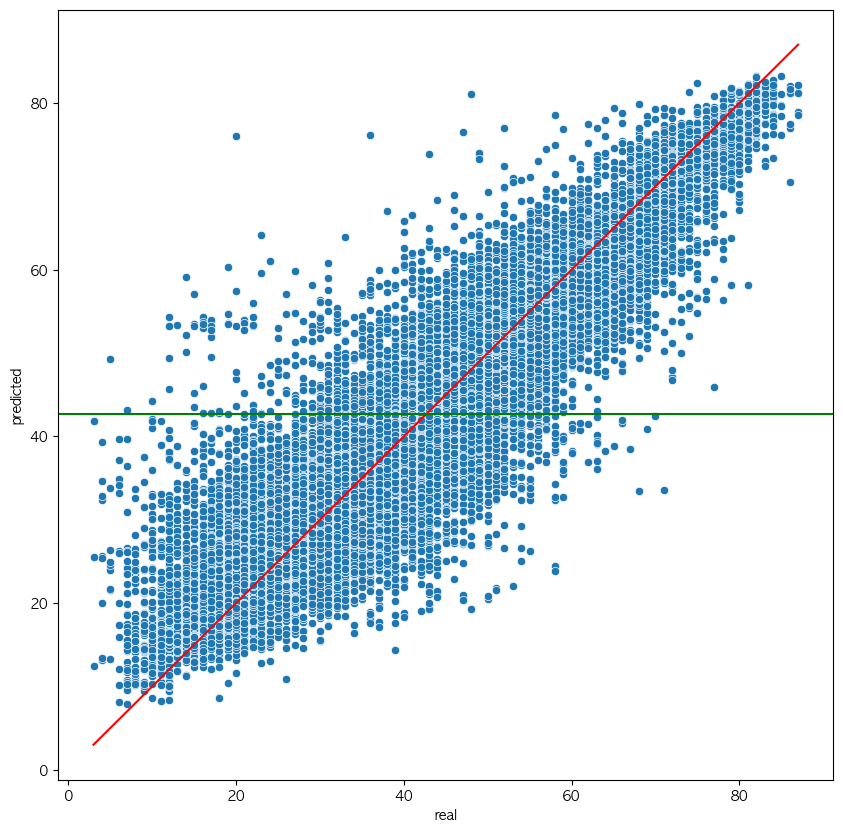

maximum_speed_limit      0.232462
end_longitude            0.213457
base_hour                0.087764
end_latitude             0.073430
road_name                0.071746
road_rating              0.067565
start_longitude          0.055890
start_latitude           0.052819
end_node_name            0.032316
start_node_name          0.026889
day                      0.025669
month                    0.024978
day_of_week              0.015060
lane_count               0.006387
weight_restricted        0.006296
road_type                0.004363
start_turn_restricted    0.001564
end_turn_restricted      0.001181
connect_code             0.000131
multi_linked             0.000031
height_restricted        0.000000
vehicle_restricted       0.000000
dtype: float64


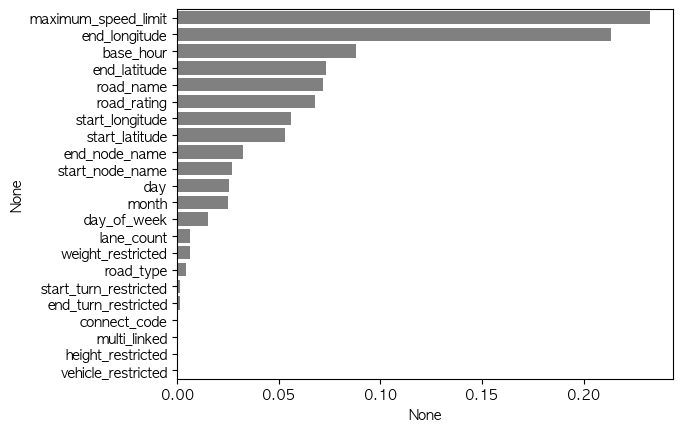

In [248]:
rfr.fit(x_train_scaled, y_train)

y_pred_train = rfr.predict(x_train_scaled)
y_pred_test = rfr.predict(x_test_scaled)


print('r2_score')
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

print('mae')
print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

print('rmse')
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))



result = pd.DataFrame({'real' : y_test, 'predicted': y_pred_test})
result['diff'] = result['real'] - result['predicted']

sns.scatterplot(data=result, x='real', y='predicted')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], color='red')
plt.gcf().set_size_inches(10,10)
plt.axhline(y_test.mean(), color='green')
plt.show()


top20 = pd.Series(rfr.feature_importances_, x_train_scaled.columns)
top20 = top20.sort_values(ascending=False)
print(top20)
sns.barplot(x=top20, y=top20.index, color='grey')
plt.show()

maximum_speed_limit      0.237706
end_longitude            0.186161
base_hour                0.086400
road_rating              0.079507
end_latitude             0.074993
road_name                0.069910
start_longitude          0.065121
start_latitude           0.059514
end_node_name            0.031822
start_node_name          0.026647
day                      0.025459
month                    0.021377
day_of_week              0.014958
lane_count               0.005931
weight_restricted        0.004300
year                     0.003761
road_type                0.003000
start_turn_restricted    0.002046
end_turn_restricted      0.001248
connect_code             0.000122
multi_linked             0.000016
height_restricted        0.000000
vehicle_restricted       0.000000
dtype: float64


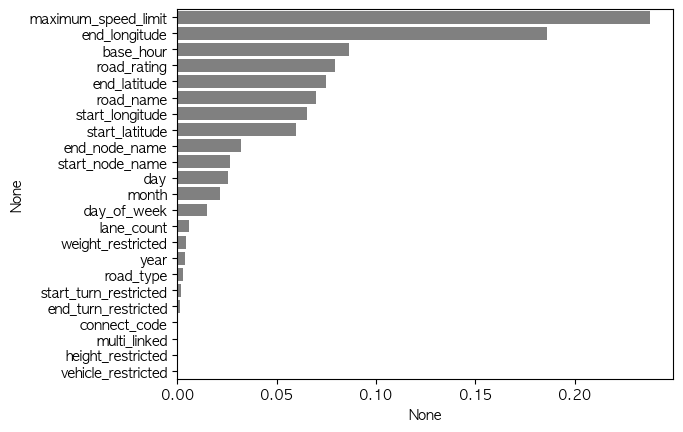

In [ ]:
top20 = pd.Series(rfr.feature_importances_, x_train.columns)
top20 = top20.sort_values(ascending=False)
print(top20)
sns.barplot(x=top20, y=top20.index, color='grey')
plt.show()

In [249]:
def model_check(model):
    model.fit(x_train_scaled, y_train)

    y_pred_train = model.predict(x_train_scaled)
    y_pred_test = model.predict(x_test_scaled)


    print('r2_score')
    print(r2_score(y_train, y_pred_train))
    print(r2_score(y_test, y_pred_test))

    print('mae')
    print(mean_absolute_error(y_train, y_pred_train))
    print(mean_absolute_error(y_test, y_pred_test))

    print('rmse')
    print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print(np.sqrt(mean_squared_error(y_test, y_pred_test)))



    result = pd.DataFrame({'real' : y_test, 'predicted': y_pred_test})
    result['diff'] = result['real'] - result['predicted']

    sns.scatterplot(data=result, x='real', y='predicted')
    plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], color='red')
    plt.gcf().set_size_inches(10,10)
    plt.axhline(y_test.mean(), color='green')
    plt.show()


    top20 = pd.Series(model.feature_importances_, x_train_scaled.columns)
    top20 = top20.sort_values(ascending=False)
    print(top20)
    sns.barplot(x=top20, y=top20.index, color='grey')
    plt.show()

r2_score
0.9854644309127683
0.8530943934835363
mae
1.3411751428571426
4.26102
rmse
1.9220024944238312
6.083596017159588


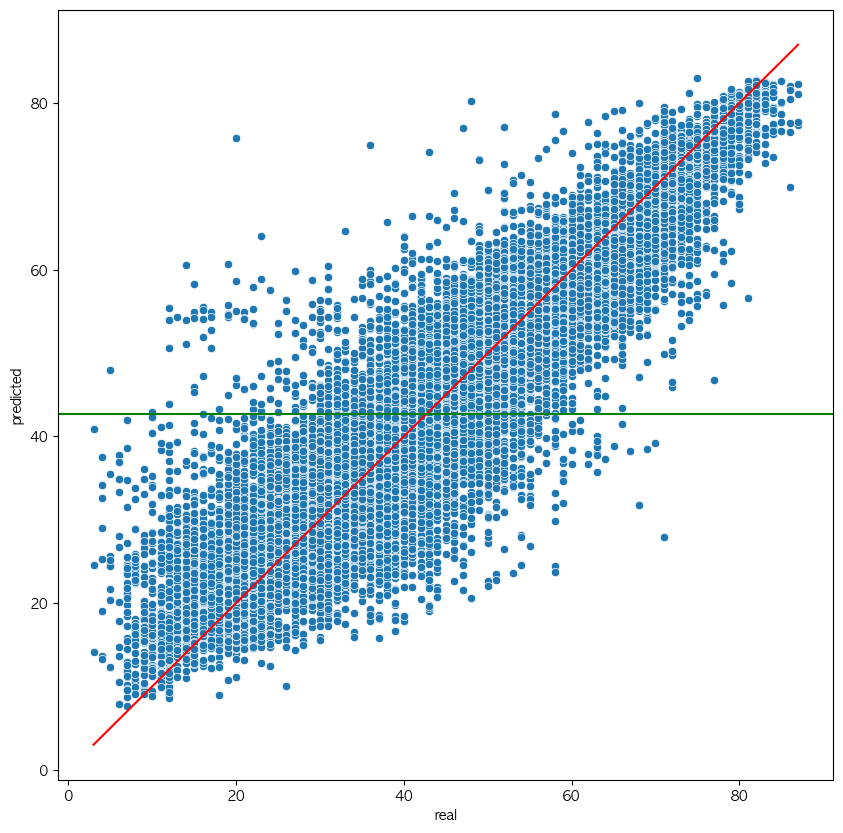

maximum_speed_limit      0.232250
end_longitude            0.210373
base_hour                0.087681
end_latitude             0.073664
road_name                0.072053
road_rating              0.068013
start_longitude          0.057545
start_latitude           0.052263
end_node_name            0.032685
start_node_name          0.027846
day                      0.025726
month                    0.025002
day_of_week              0.014988
lane_count               0.006659
weight_restricted        0.006226
road_type                0.004349
start_turn_restricted    0.001392
end_turn_restricted      0.001069
connect_code             0.000181
multi_linked             0.000033
height_restricted        0.000000
vehicle_restricted       0.000000
dtype: float64


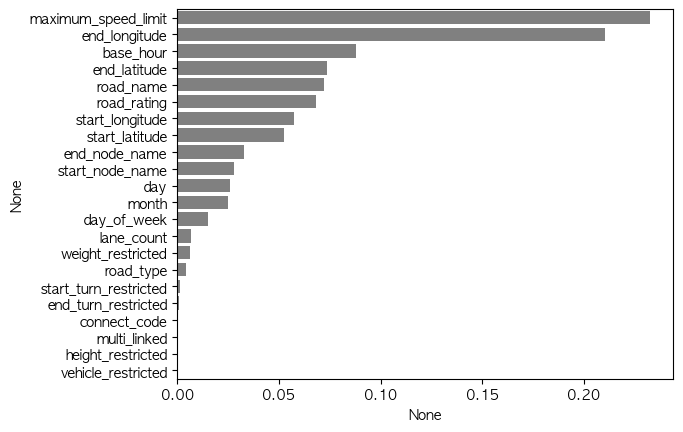

In [250]:
model_check(rfr)

r2_score
0.9014048349966961
0.8118767302332774
mae
3.6823514610528947
5.0993776446123915
rmse
5.005710582786113
6.8843420613400435


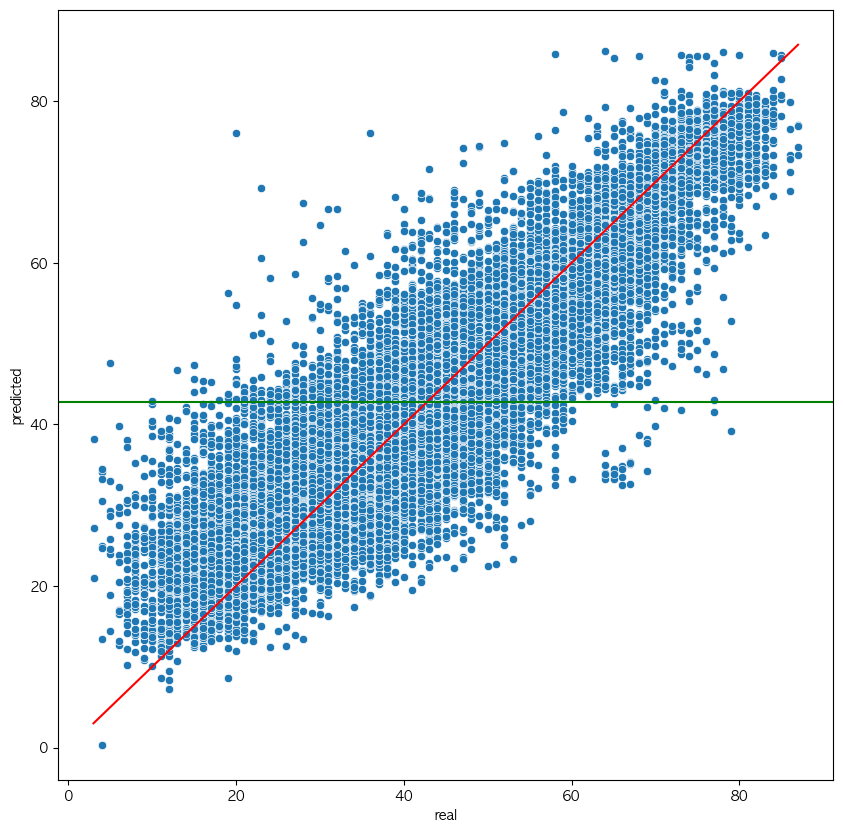

maximum_speed_limit      0.342301
road_rating              0.129532
connect_code             0.107913
end_longitude            0.077296
start_longitude          0.057711
road_name                0.057334
end_latitude             0.039867
weight_restricted        0.039156
road_type                0.034587
start_latitude           0.027879
lane_count               0.015569
start_turn_restricted    0.014770
base_hour                0.013911
end_node_name            0.012049
start_node_name          0.010732
end_turn_restricted      0.008269
multi_linked             0.006831
month                    0.002335
day                      0.001000
day_of_week              0.000955
height_restricted        0.000000
vehicle_restricted       0.000000
dtype: float32


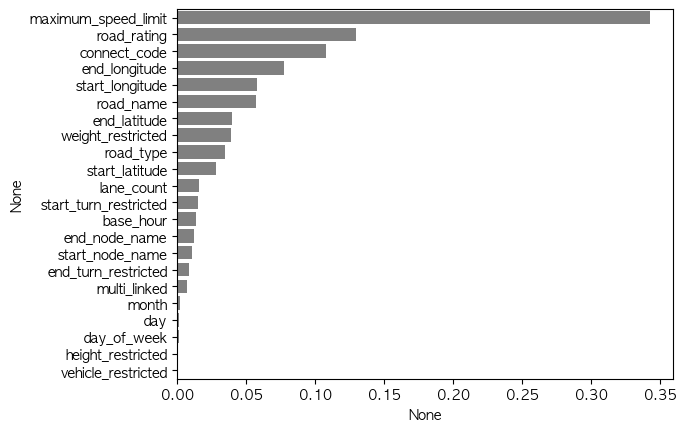

In [251]:
xgb_r = xgb.XGBRegressor()
model_check(xgb_r)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1689
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 20
[LightGBM] [Info] Start training from score 42.823643
r2_score
0.8520124020499993
0.8127485511788878
mae
4.638610738568568
5.196322191936971
rmse
6.132684005151013
6.868371460121838


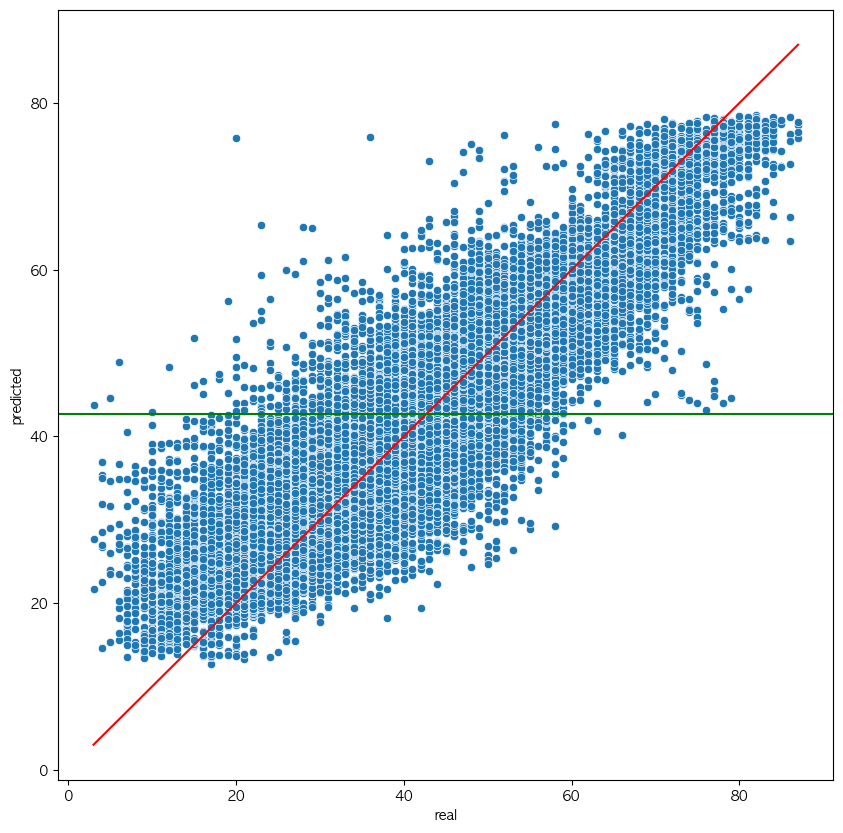

end_longitude            443
start_latitude           393
end_latitude             374
start_longitude          316
start_node_name          303
end_node_name            288
road_name                212
base_hour                212
maximum_speed_limit      147
road_rating               76
month                     57
lane_count                44
weight_restricted         33
end_turn_restricted       26
road_type                 18
start_turn_restricted     17
day_of_week               15
day                       14
connect_code               8
multi_linked               4
height_restricted          0
vehicle_restricted         0
dtype: int32


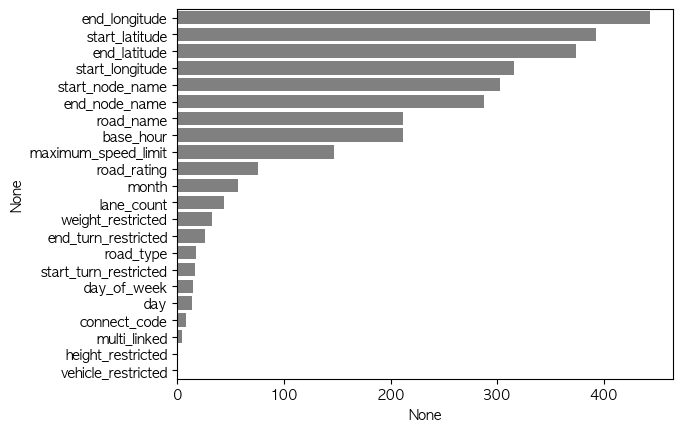

In [252]:
lgb_r = lgb.LGBMRegressor()
model_check(lgb_r)

In [254]:
from sklearn.linear_model import LinearRegression

r2_score
0.3806806658416243
0.3709140661164584
mae
10.183132692543372
10.205113016539185
rmse
12.545710053358293
12.58914306426763


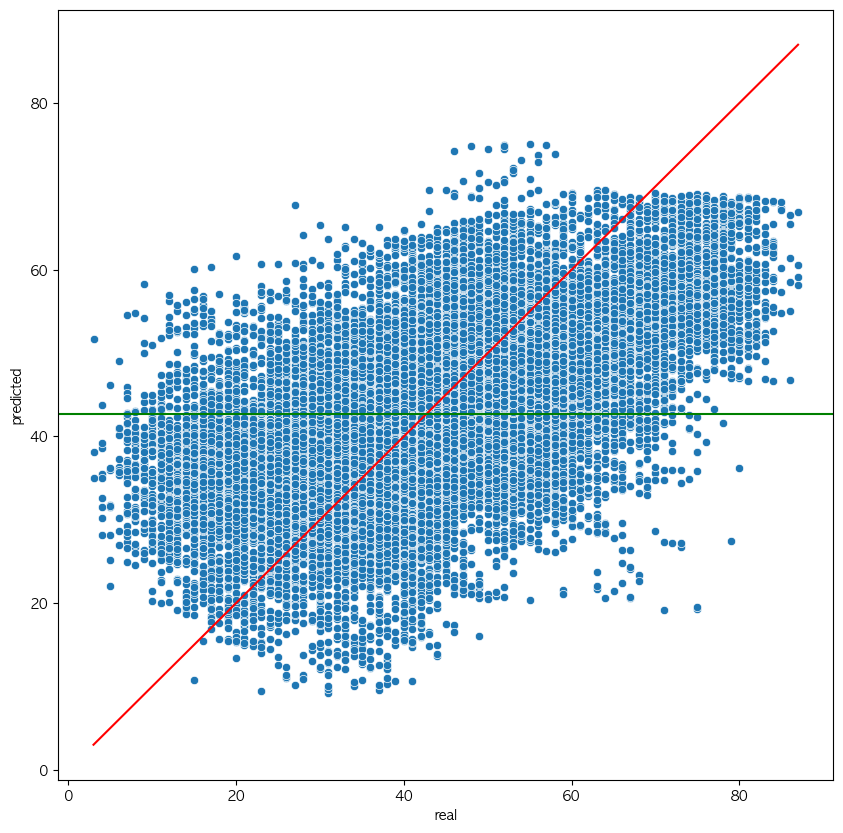

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [255]:
lr = LinearRegression()
model_check(lr)

In [256]:
import tensorflow as tf

2024-03-21 20:02:41.825751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [261]:
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation ='relu' ,input_dim=x_train.shape[1]),
    tf.keras.layers.Dense(32, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='linear'),
])



tf_model.compile(optimizer='adam', loss='mean_squared_error')

tf_model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(x_test_scaled, y_test))

y_pred_train_prob = tf_model.predict(x_train_scaled)
y_pred_test_prob = tf_model.predict(x_test_scaled)

Epoch 1/10


2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 910us/step - loss: 412.1259 - val_loss: 115.4907
Epoch 2/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step - loss: 109.9894 - val_loss: 94.5477
Epoch 3/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - loss: 90.6043 - val_loss: 79.1997
Epoch 4/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - loss: 75.2131 - val_loss: 69.4152
Epoch 5/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - loss: 67.8267 - val_loss: 64.1497
Epoch 6/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 802us/step - loss: 62.0208 - val_loss: 61.1998
Epoch 7/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step - loss: 59.6975 - val_loss: 58.0082
Epoch 8/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 799us/step - loss: 57.6689 - val_loss: 58.8858
Epoch 9/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - loss: 55.2287 - val_loss: 57.3231
Epoch 10/10
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 54.2162 - val_loss: 54.5307
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step


In [269]:
y_pred_train_prob.flatten()

array([25.906553, 35.495502, 65.03389 , ..., 61.76095 , 11.244913,
       30.419672], dtype=float32)

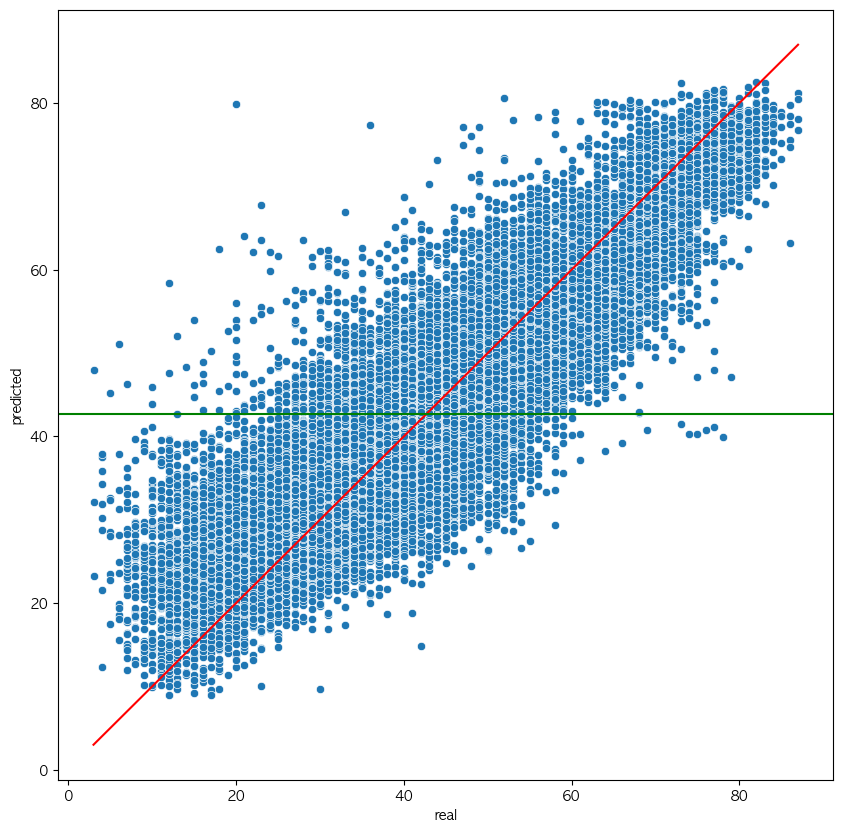

0.7930580542058019
0.7835342228485018


In [270]:
result = pd.DataFrame({'real' : y_test, 'predicted': y_pred_test_prob})
result['diff'] = result['real'] - result['predicted']

sns.scatterplot(data=result, x='real', y='predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.gcf().set_size_inches(10,10)
plt.axhline(y_test.mean(), color='green')
plt.show()


print(r2_score(y_train, y_pred_train_prob.flatten()))
print(r2_score(y_test, y_pred_test_prob.flatten()))


In [2]:
import shap

In [3]:
explainer = shap.Explainer(rfr, x_train_scaled)

NameError: name 'rfr' is not defined

In [4]:
shap_values = explainer(x_test_scaled)

NameError: name 'explainer' is not defined